In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [4]:
%run ./cmnist.py

[Epoch 0] Train: ELBO -2.6590e+00 (12s) Test: ELBO 1.9346e+00, Accuracy 0.126 (1s)
[Epoch 1] Train: ELBO -1.6065e+00 (12s) Test: ELBO 1.5320e+00, Accuracy 0.327 (1s)
[Epoch 2] Train: ELBO -1.4034e+00 (12s) Test: ELBO 1.3670e+00, Accuracy 0.471 (1s)
[Epoch 3] Train: ELBO -1.3159e+00 (12s) Test: ELBO 1.2846e+00, Accuracy 0.579 (1s)
[Epoch 4] Train: ELBO -1.2682e+00 (12s) Test: ELBO 1.2429e+00, Accuracy 0.611 (1s)
[Epoch 5] Train: ELBO -1.2400e+00 (12s) Test: ELBO 1.2170e+00, Accuracy 0.627 (1s)
[Epoch 6] Train: ELBO -1.2196e+00 (12s) Test: ELBO 1.1956e+00, Accuracy 0.655 (1s)
[Epoch 7] Train: ELBO -1.2031e+00 (12s) Test: ELBO 1.1782e+00, Accuracy 0.691 (1s)
[Epoch 8] Train: ELBO -1.1891e+00 (12s) Test: ELBO 1.1638e+00, Accuracy 0.722 (1s)
[Epoch 9] Train: ELBO -1.1784e+00 (13s) Test: ELBO 1.1541e+00, Accuracy 0.738 (1s)


/opt/anaconda/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


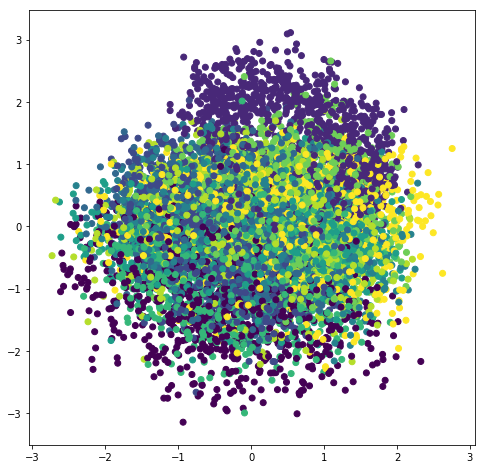

In [5]:
# display a 2D plot of the digit classes in the latent space
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
for (x, y) in test_data:
    if len(x) == BATCH_SIZE:
        images = Variable(x).view(-1, NUM_PIXELS)
        labels_onehot = Variable(torch.zeros(BATCH_SIZE, NUM_DIGITS).byte())
        labels_onehot.scatter_(1, y.unsqueeze(1), 1)
        q = enc(images, labels_onehot)
        z = q['styles'].value.data.numpy()
        ax.scatter(z[:, 0], z[:, 1], c=y.numpy())
#fig.colorbar()
fig.show()

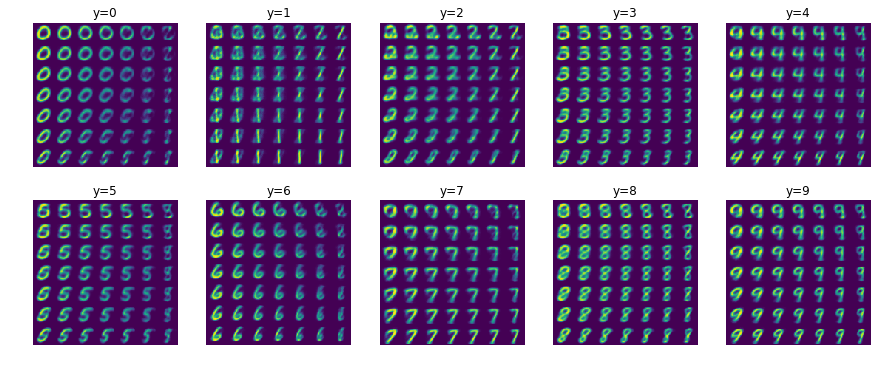

In [6]:
# display a 2D manifold of the digits
n = 7  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
null_image = Variable(torch.Tensor(np.zeros((1, 784))))

plt.figure(figsize=(15, 6))
for y in range(10):
    plt.subplot(2, 5, y+1)
    y_hot = np.zeros((1,10))
    y_hot[0,y] = 1
    y_hot = Variable(torch.FloatTensor(y_hot))
    for i, z0i in enumerate(grid_x):
        for j, z1j in enumerate(grid_y):
            z = np.zeros((1,NUM_STYLE,))
            z[0,0] = z0i
            z[0,1] = z1j
            z = Variable(torch.FloatTensor(z))
            p = dec(null_image, {'styles': z, 'digits': y_hot})
            digit = p['images'].value.data.numpy().reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit
    plt.imshow(figure)
    plt.title('y=%d' % y)
    plt.axis('off')
plt.show()

In [5]:
NUM_STYLE

2